In [267]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
color_platette = {
        'Task 1': {
            'learning_rate=0.01': '#1f77b4',   # 蓝色
            'learning_rate=0.05': '#ff7f0e',   # 橙色
            'learning_rate=0.2':  '#2ca02c',   # 绿色
            },
        'Task 2': {
            'Using Scheduler': '#d62728',      # 红色
            'Not Using Scheduler': '#9467bd',  # 紫色
            },
        'Task 3': {
            'weight_decay=1e-4': '#8c564b',    # 棕色
            'weight_decay=5e-4': '#e377c2',    # 粉色
        },
        'Task 4': {
            'all_relu': '#7f7f7f',                   # 灰色
            'sigmoid_at_4,5,6,7,8,9,10': '#17becf',  # 青色
        }
    }

def plot_train_loss_curves(train_loss_df,
                           task_ind,
                           save:bool = False,
                           save_dir:str = 'plots/'):
    """
    Plot training loss curves for each epoch.

    Args:
        train_loss_df (pd.DataFrame): DataFrame containing training loss data.
    """
    plt.figure(figsize=(10, 6))
    for col in train_loss_df.columns:
        plt.plot(train_loss_df[col], label=col, alpha=0.7, color=color_platette[task_ind][col])
    # plt.title('Training Loss Curves of {}'.format(task_ind))
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Train_Loss_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()
    plt.show()

def plot_val_loss_curves(val_loss_df,
                         task_ind,
                         save:bool = False,
                         save_dir:str = 'plots/'):
    """
    Plot validation loss curves for each epoch.
    Args:
        val_loss_df (pd.DataFrame): DataFrame containing validation loss data.
    """
    plt.figure(figsize=(10, 6))
    for col in val_loss_df.columns:
        plt.plot(val_loss_df[col], label=col, alpha=0.7, color=color_platette[task_ind][col])
    # plt.title('Validation Loss Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.xlim(1, len(val_loss_df))
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Val_Loss_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()


def plot_val_acc_curves(val_acc_df,
                        task_ind,
                        save:bool = False,
                        save_dir:str = 'plots/'):
    """
    Plot validation accuracy curves for each epoch.
    Args:
        val_acc_df (pd.DataFrame): DataFrame containing validation accuracy data.
    """
    plt.figure(figsize=(10, 6))
    for col in val_acc_df.columns:
        plt.plot(val_acc_df[col], label=col, alpha=0.7, color=color_platette[task_ind][col])
    # plt.title('Validation Accuracy Curves of {}'.format(task_ind))
    plt.xlabel('Epochs')
    plt.xlim(1, len(val_acc_df))
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Val_Acc_curves.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

def plot_test_acc(test_accuracy_df,
                  task_ind,
                  save:bool = False,
                  save_dir:str = 'plots/'):
    """
    Plot test accuracy for each model.
    Args:
        test_accuracy_df (pd.DataFrame): DataFrame containing test accuracy data.
    """
    plt.figure(figsize=(8, 8))
    for col in test_accuracy_df.columns:
        plt.bar(col, test_accuracy_df[col].values[0], color=color_platette[task_ind][col])
    # plt.title('Test Accuracy of {}'.format(task_ind))
    # plt.xlabel('')
    # add value scaler
    for i, v in enumerate(test_accuracy_df.values[0]):
        plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom', fontsize=10)
    plt.ylabel('Accuracy')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Test_Acc.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

def plot_l2_norm(l2_norm_df,
                task_ind,
                save:bool = False,
                save_dir:str = 'plots/'):
    """
    Plot L2 norm for each model.
    Args:
        l2_norm_df (pd.DataFrame): DataFrame containing L2 norm data.
    """
    plt.figure(figsize=(10, 6))
    for col in l2_norm_df.columns:
        plt.plot(l2_norm_df[col], label=col, alpha=0.7, color=color_platette[task_ind][col])
    # plt.title('L2 Norm of {}'.format(task_ind))
    plt.xlabel('Epochs')
    # plt.xlim(1, len(l2_norm_df))
    plt.ylabel('L2 Norm')
    plt.legend(loc='upper right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    if save:
        if save_dir is None:
            raise ValueError("save_path must be provided if save is True.")
        os.makedirs(os.path.dirname(save_dir), exist_ok=True)
        save_path = os.path.join(save_dir, '{}_Train_l2_norm.pdf'.format(task_ind))
        plt.savefig(save_path)
    else:
        plt.show()

# Task 1 - Learning rate

Identify 3 learning rate:

- 0.01
- 0.05
- 0.2

In [269]:
task1_train_loss_df = pd.read_csv('experiment_result/Task 1 - Train:loss.csv', index_col=0)
task1_train_loss_df = task1_train_loss_df.iloc[:, [0, 3, 6]]
task1_train_loss_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']
task1_val_loss_df = pd.read_csv('experiment_result/Task 1 - Val:Average Loss.csv', index_col=0)
task1_val_loss_df = task1_val_loss_df.iloc[:, [3, 9, 15]]
task1_val_loss_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']
task1_val_accuracy_df = pd.read_csv('experiment_result/Task 1 - Val:Accuracy.csv', index_col=0)
task1_val_accuracy_df = task1_val_accuracy_df.iloc[:, [3, 9, 15]]
task1_val_accuracy_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']
task1_test_accuracy_df = pd.read_csv('experiment_result/Task 1 - Test:Accuracy.csv')
task1_test_accuracy_df = task1_test_accuracy_df.iloc[:, [1, 4, 7]]
task1_test_accuracy_df.columns = ['learning_rate=0.2', 'learning_rate=0.01', 'learning_rate=0.05']

In [270]:
task1_val_accuracy_df

,learning_rate=0.2,learning_rate=0.01,learning_rate=0.05
epoch,,,
1,0.0899,0.0853,0.1006
2,0.1417,0.1444,0.1557
3,0.1846,0.1762,0.1979
4,0.2209,0.2186,0.2354
5,0.2495,0.2496,0.2422
6,0.2660,0.2645,0.2944
7,0.3157,0.3087,0.3262
8,0.3336,0.3330,0.3338
9,0.3621,0.3302,0.3819


### plotting

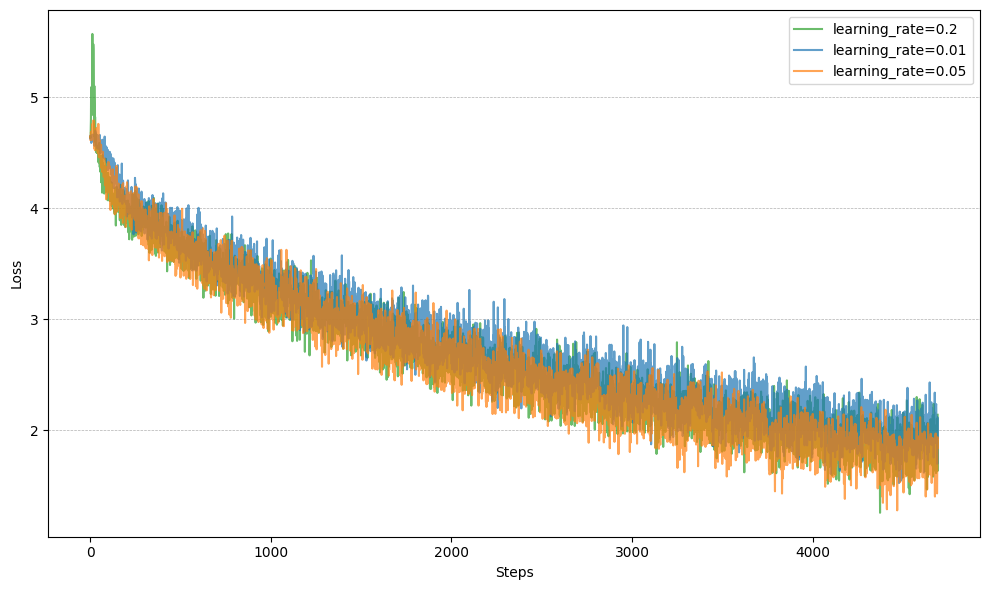

In [271]:
plot_train_loss_curves(task1_train_loss_df,
                       task_ind='Task 1',
                       save=True,
                       save_dir='plots/')

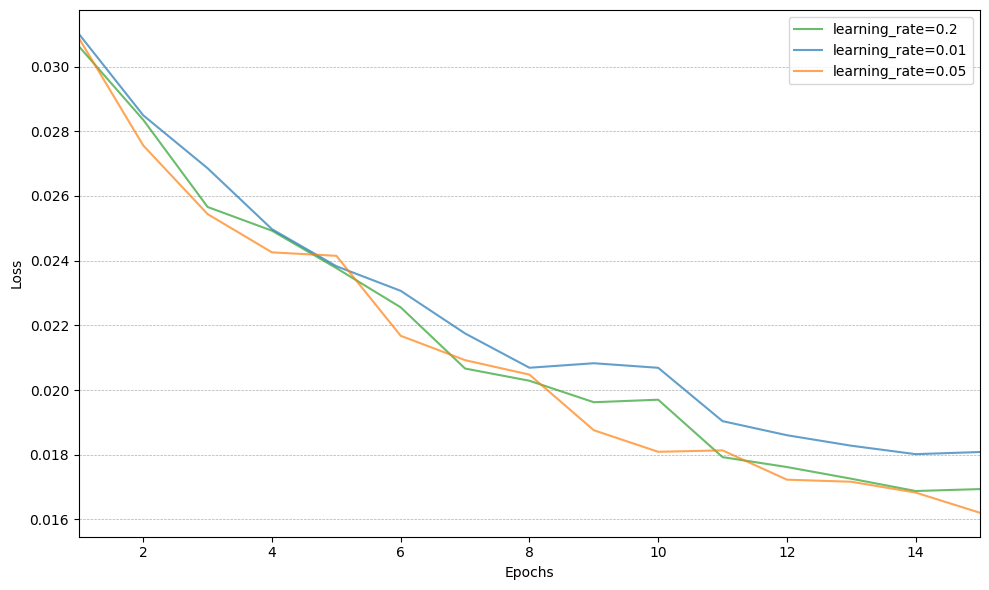

In [272]:
plot_val_loss_curves(task1_val_loss_df,
                     task_ind='Task 1',
                     save=True,
                     save_dir='plots/')

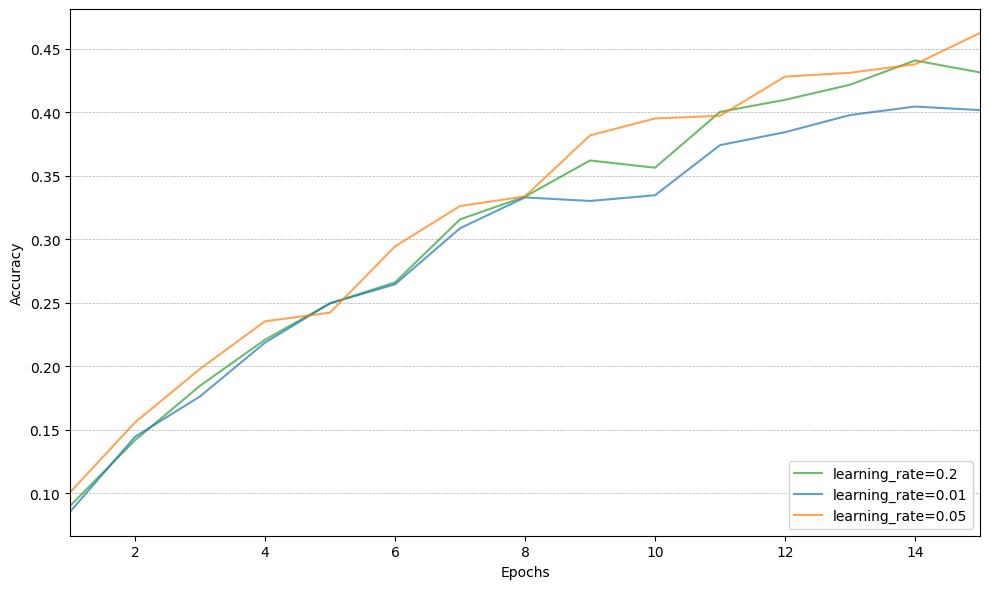

In [273]:
plot_val_acc_curves(task1_val_accuracy_df,
                   task_ind='Task 1',
                   save=True,
                   save_dir='plots/')

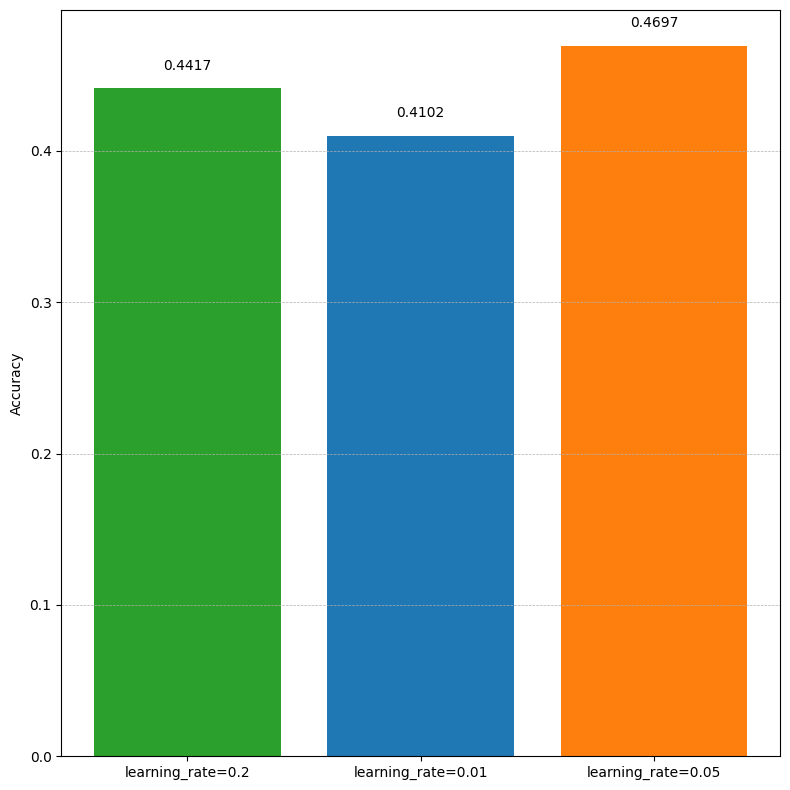

In [274]:
plot_test_acc(task1_test_accuracy_df,
              task_ind='Task 1',
              save=True,
              save_dir='plots/')

# Task 2 - Learning Rate Scheduler

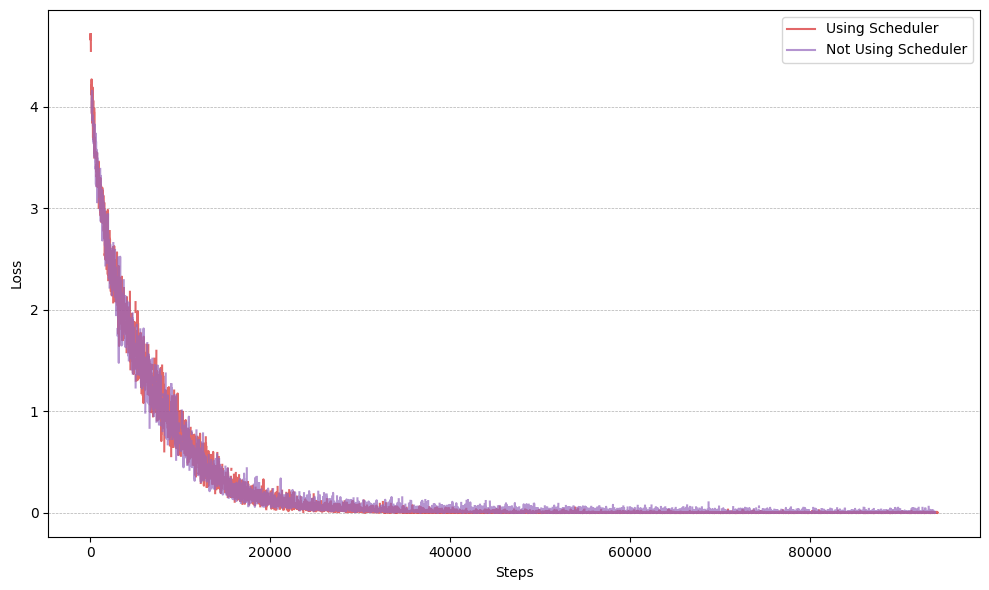

In [275]:
task2_train_loss_df = pd.read_csv('experiment_result/Task 2 - Train:loss.csv', index_col=0)
task2_train_loss_df = task2_train_loss_df.iloc[:, [0, 3]]
task2_train_loss_df.columns = ['Using Scheduler', 'Not Using Scheduler']
plot_train_loss_curves(task2_train_loss_df,
                       task_ind='Task 2',
                       save=True,
                       save_dir='plots/')

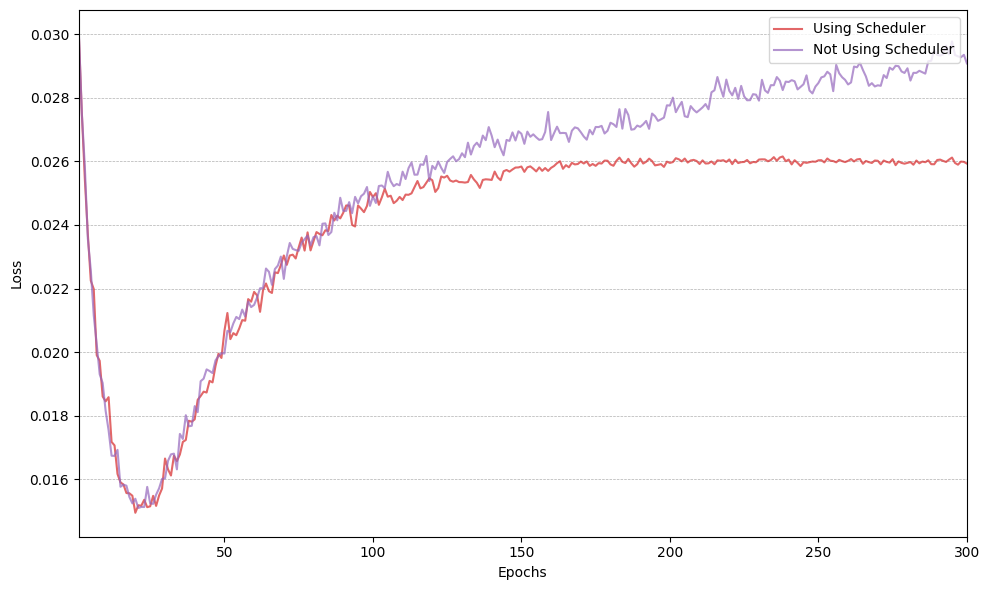

In [276]:
task2_val_loss_df = pd.read_csv('experiment_result/Task 2 - Val:Average Loss.csv', index_col=0)
task2_val_loss_df = task2_val_loss_df.iloc[:, [3, 9]]
task2_val_loss_df.columns = ['Using Scheduler', 'Not Using Scheduler']
plot_val_loss_curves(task2_val_loss_df,
                     task_ind='Task 2',
                     save=True,
                     save_dir='plots/')

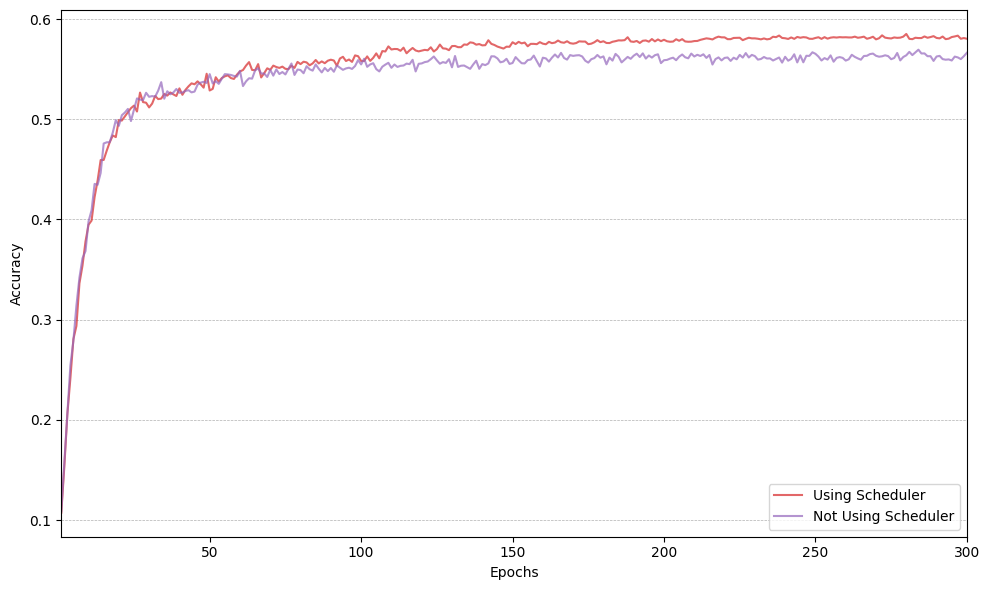

In [277]:
task2_val_accuracy_df = pd.read_csv('experiment_result/Task 2 - Val:Accuracy.csv', index_col=0)
task2_val_accuracy_df = task2_val_accuracy_df.iloc[:, [3, 9]]
task2_val_accuracy_df.columns = ['Using Scheduler', 'Not Using Scheduler']
plot_val_acc_curves(task2_val_accuracy_df,
                   task_ind='Task 2',
                   save=True,
                   save_dir='plots/')

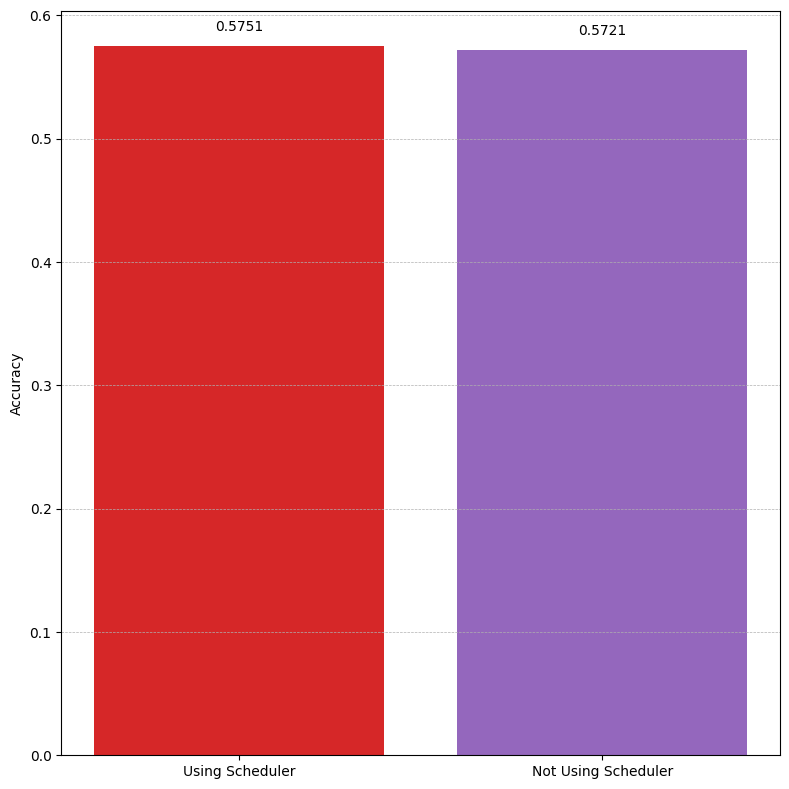

In [278]:
task2_test_accuracy_df = pd.read_csv('experiment_result/Task 2 - Test:Accuracy.csv')
task2_test_accuracy_df = task2_test_accuracy_df.iloc[:, [1, 4]]
task2_test_accuracy_df.columns = ['Using Scheduler', 'Not Using Scheduler']
task2_test_accuracy_df.iloc[0,0] = task2_test_accuracy_df.iloc[1,0]
# task2_test_accuracy_df.iloc[1,0] = task2_test_accuracy_df.iloc[0,0]
task2_test_accuracy_df = task2_test_accuracy_df.iloc[[0]]
plot_test_acc(task2_test_accuracy_df,
              task_ind='Task 2',
              save=True,
              save_dir='plots/')

# Task 3 Weight Decay

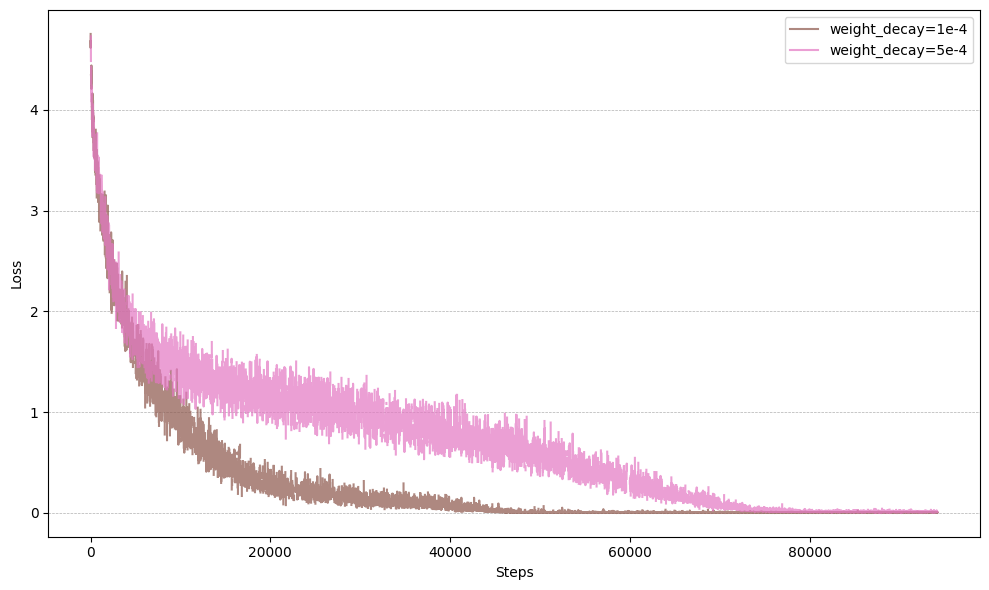

In [279]:
task3_train_loss_df = pd.read_csv('experiment_result/Task 3 - Train:loss.csv', index_col=0)
task3_train_loss_df = task3_train_loss_df.iloc[:, [0, 3]]
task3_train_loss_df.columns = ['weight_decay=1e-4', 'weight_decay=5e-4']
plot_train_loss_curves(task3_train_loss_df,
                       task_ind='Task 3',
                       save=True,
                       save_dir='plots/')

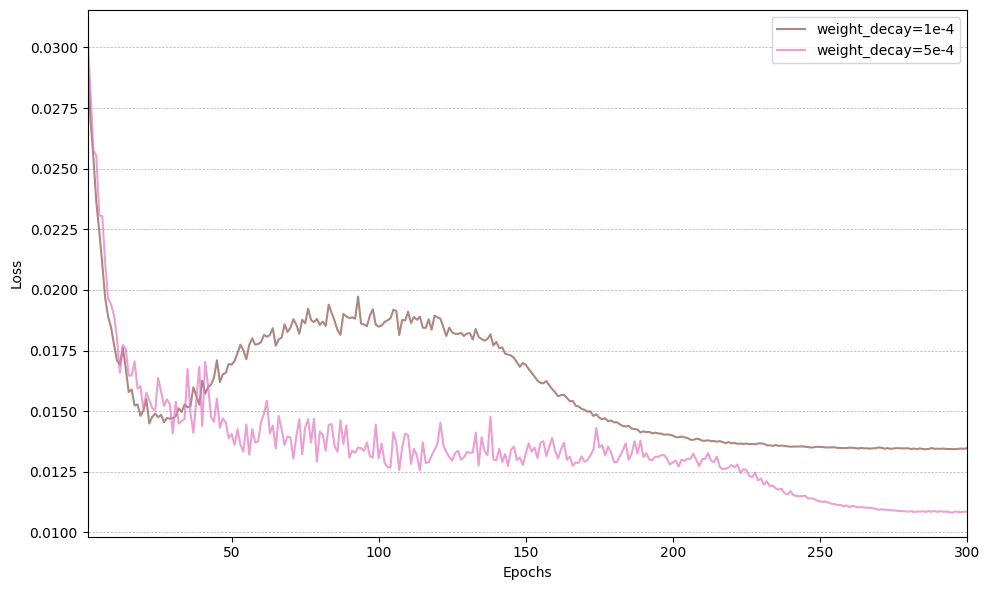

In [280]:
task3_val_loss_df = pd.read_csv('experiment_result/Task 3 - Val:Average Loss.csv', index_col=0)
task3_val_loss_df = task3_val_loss_df.iloc[:, [3, 9]]
task3_val_loss_df.columns = ['weight_decay=1e-4', 'weight_decay=5e-4']
plot_val_loss_curves(task3_val_loss_df,
                     task_ind='Task 3',
                     save=True,
                     save_dir='plots/')

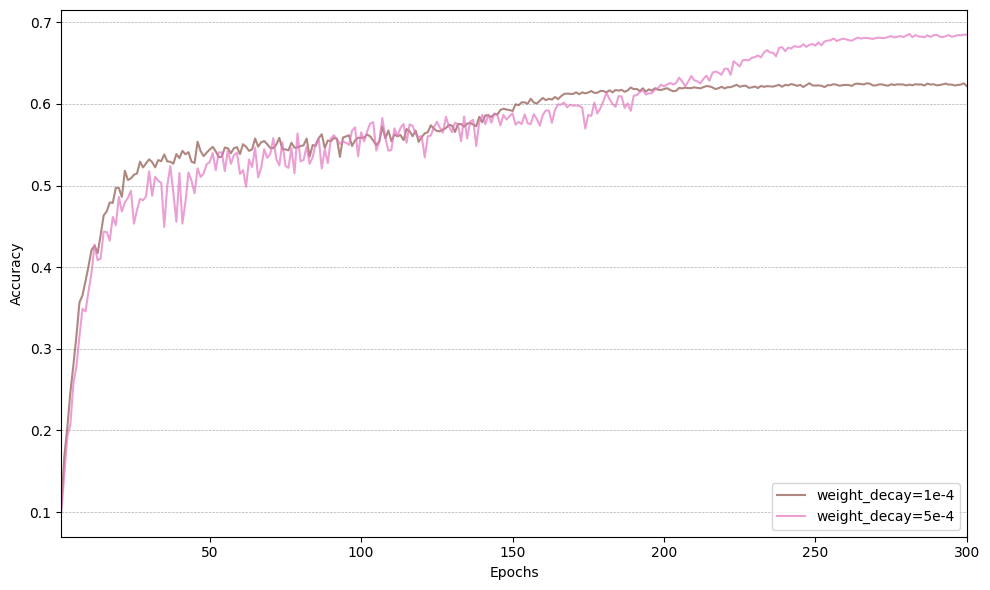

In [281]:
task3_val_accuracy_df = pd.read_csv('experiment_result/Task 3 - Val:Accuracy.csv', index_col=0)
task3_val_accuracy_df = task3_val_accuracy_df.iloc[:, [3, 9]]
task3_val_accuracy_df.columns = ['weight_decay=1e-4', 'weight_decay=5e-4']
plot_val_acc_curves(task3_val_accuracy_df,
                   task_ind='Task 3',
                   save=True,
                   save_dir='plots/')

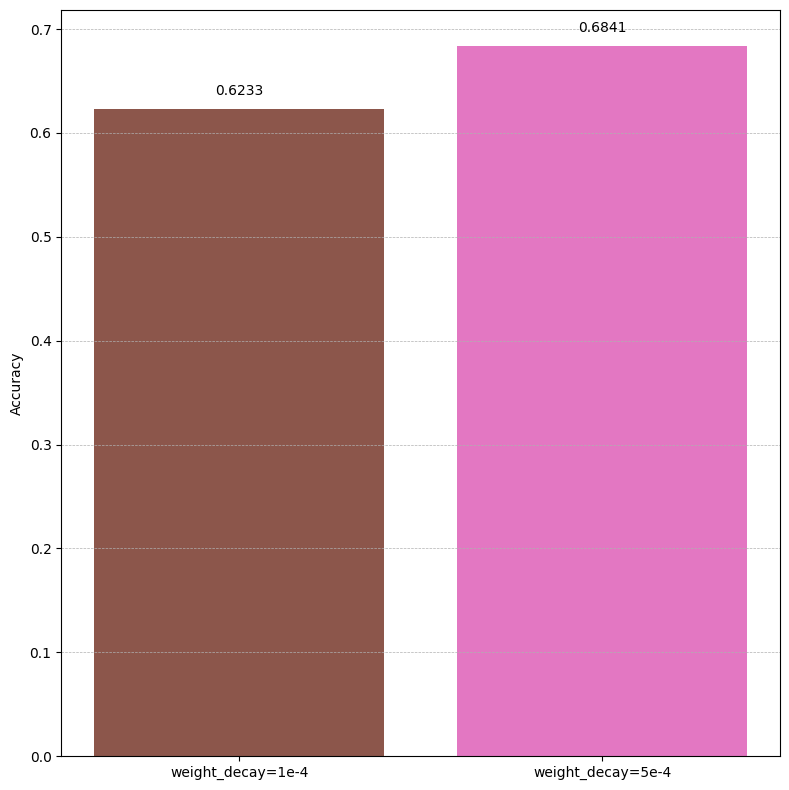

In [282]:
task3_test_accuracy_df = pd.read_csv('experiment_result/Task 3 - Test:Accuracy.csv')
task3_test_accuracy_df = task3_test_accuracy_df.iloc[:, [1, 4]]
task3_test_accuracy_df.columns = ['weight_decay=1e-4', 'weight_decay=5e-4']
plot_test_acc(task3_test_accuracy_df,
              task_ind='Task 3',
              save=True,
              save_dir='plots/')

# Task 4 - Activation Function

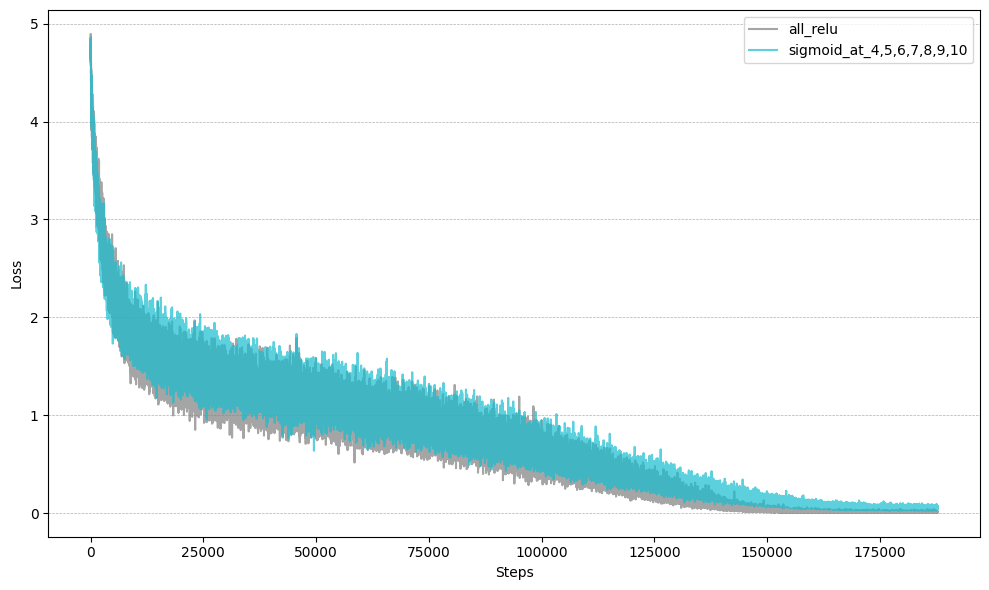

In [283]:
task4_train_loss_df = pd.read_csv('experiment_result/Task 4 - Train:loss.csv', index_col=0)
task4_train_loss_df = task4_train_loss_df.iloc[:, [0, 3]]
task4_train_loss_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_train_loss_curves(task4_train_loss_df,
                       task_ind='Task 4',
                       save=True,
                       save_dir='plots/')

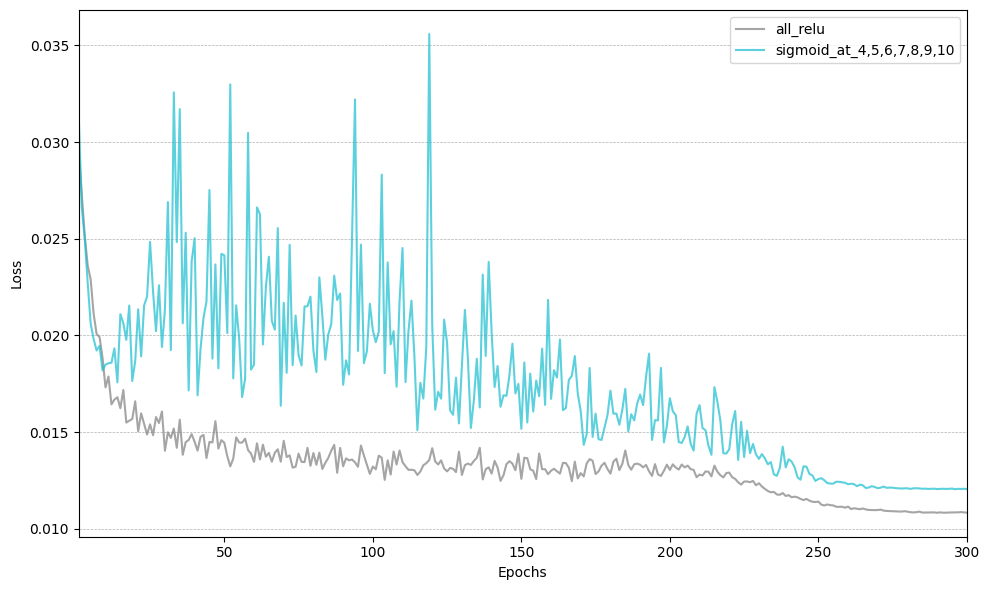

In [284]:
task4_val_loss_df = pd.read_csv('experiment_result/Task 4 - Val:Average Loss.csv', index_col=0)
task4_val_loss_df = task4_val_loss_df.iloc[:, [3, 9]]
task4_val_loss_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_val_loss_curves(task4_val_loss_df,
                     task_ind='Task 4',
                     save=True,
                     save_dir='plots/')

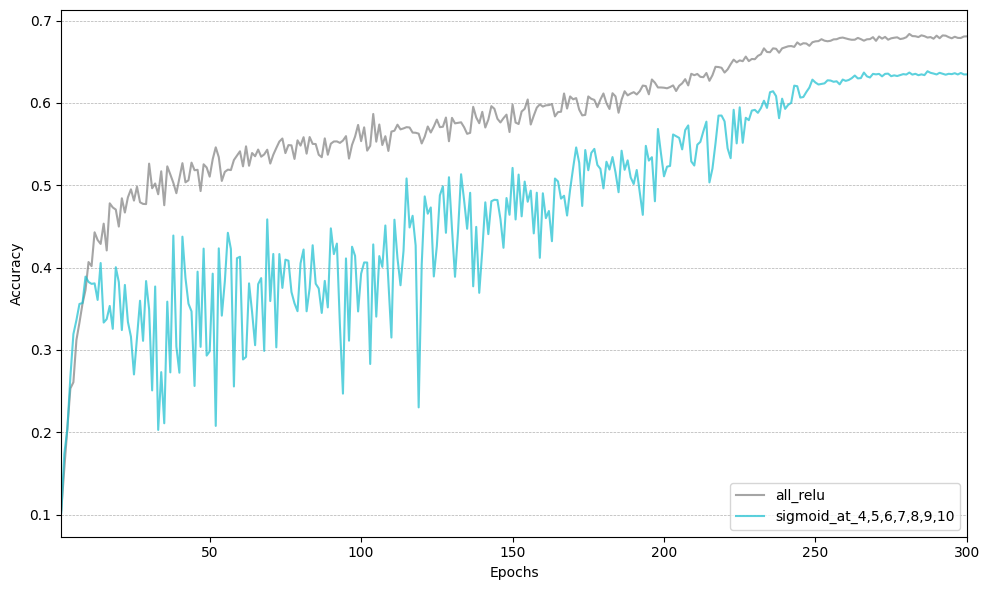

In [285]:
task4_val_accuracy_df = pd.read_csv('experiment_result/Task 4 - Val:Accuracy.csv', index_col=0)
task4_val_accuracy_df = task4_val_accuracy_df.iloc[:, [3, 9]]
task4_val_accuracy_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_val_acc_curves(task4_val_accuracy_df,
                   task_ind='Task 4',
                   save=True,
                   save_dir='plots/')

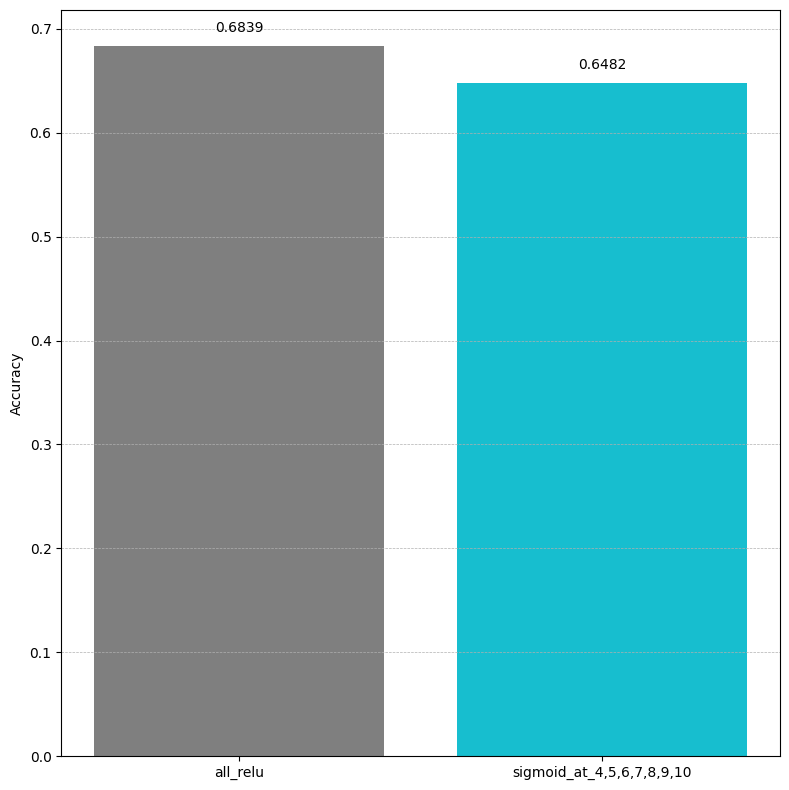

In [286]:
task4_test_accuracy_df = pd.read_csv('experiment_result/Task 4 - Test:Accuracy.csv')
task4_test_accuracy_df = task4_test_accuracy_df.iloc[:, [1, 4]]
task4_test_accuracy_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_test_acc(task4_test_accuracy_df,
              task_ind='Task 4',
              save=True,
              save_dir='plots/')

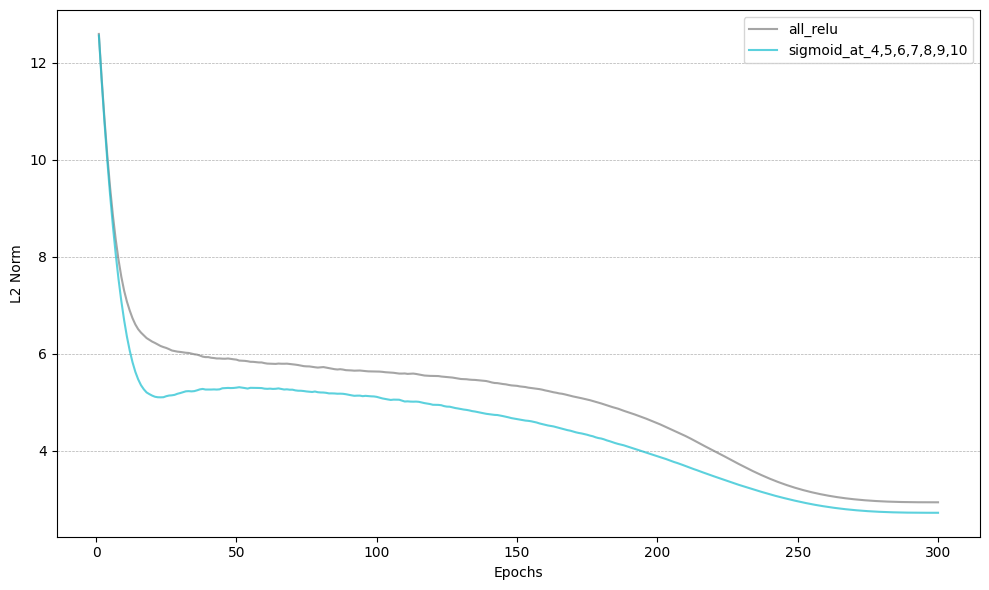

In [287]:
task4_train_l2_norm_df = pd.read_csv('experiment_result/Task 4 - Train:weight_norm.csv', index_col=0)
task4_train_l2_norm_df = task4_train_l2_norm_df.iloc[:, [3, 9]]
task4_train_l2_norm_df.columns = ['all_relu', 'sigmoid_at_4,5,6,7,8,9,10']
plot_l2_norm(task4_train_l2_norm_df,
                task_ind='Task 4',
                save=True,
                save_dir='plots/')
# task4_train_l2_norm_df